## Sales Forecasting

Here’s a step-by-step implementation of a **sales forecasting** model using linear regression. The goal is to predict future sales based on historical data, marketing spend, seasonal factors, and other relevant variables.

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load your dataset
# Getting error when pandas tries to read a CSV file that contains characters that can't be decoded using the default UTF-8 encoding

data = pd.read_csv("simulated_sales_data.csv", encoding='ISO-8859-1')

data.head()


,Date,Marketing Spend,Seasonality,Product Price,Competitor Sales,Sales
0,2020-01-01,5993.428306,3,18.173392,9582.810151,4943.983596
1,2020-01-02,4723.471398,4,20.923402,2751.773902,1947.211458
2,2020-01-03,6295.377076,1,13.264369,5390.700934,3941.179689
3,2020-01-04,8046.059713,4,15.141930,4980.213140,5268.321918
4,2020-01-05,4531.693251,3,26.002070,11036.336647,4508.705370


In [57]:
data.describe()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              1000 non-null   object 
 1   Marketing Spend   1000 non-null   float64
 2   Seasonality       1000 non-null   int64  
 3   Product Price     1000 non-null   float64
 4   Competitor Sales  1000 non-null   float64
 5   Sales             1000 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 47.0+ KB


In [58]:
data.isnull().sum()

Date                0
Marketing Spend     0
Seasonality         0
Product Price       0
Competitor Sales    0
Sales               0
dtype: int64

## Feature Engineering

Create new features if necessary, such as the month or quarter from a timestamp, or lag features (past sales data) for prediction.

In [60]:
data['Date'] = pd.to_datetime(data['Date'])
data['Month'] = data['Date'].dt.month
data['Quarter'] = data['Date'].dt.quarter

### Define the Target and Features

In [133]:
X = data[['Marketing Spend']]
y = data['Sales']

### Train-Test Split

In [136]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###  Model Training - Linear Regression

Use a linear regression model to fit the data and train the model.

In [139]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [141]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (1000, 1)
Shape of y: (1000,)


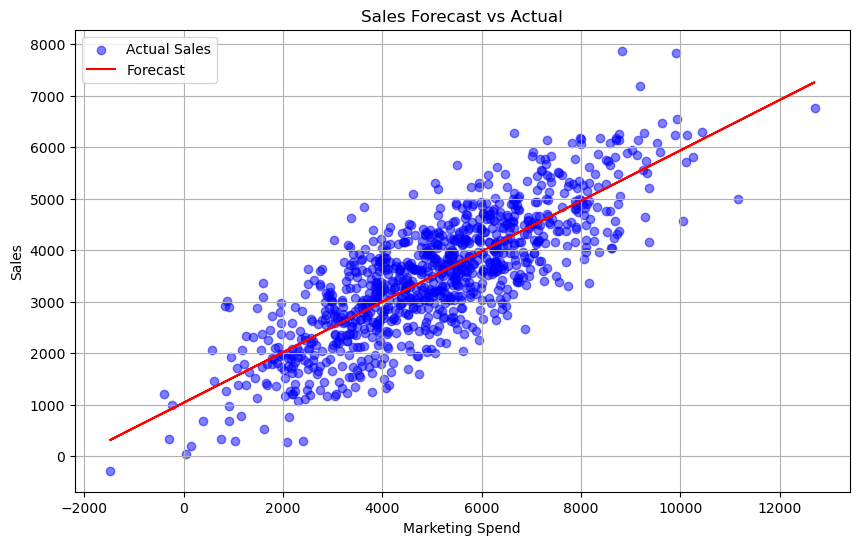

In [143]:
def sigmoid(z):
    return expit(z)

plt.figure(figsize=(10, 6))
plt.scatter(X.iloc[:, 0], y, color='blue', alpha=0.5, label='Actual Sales')
plt.plot(X.iloc[:, 0], model.predict(X), color='red', label='Forecast')
plt.xlabel("Marketing Spend")
plt.ylabel("Sales")
plt.title("Sales Forecast vs Actual")
plt.legend()
plt.grid(True)
plt.show()

### Model Evaluation

In [110]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 545339.6111311858
R-squared: 0.6193059457244763


### Interpret Results

In [113]:
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

                 Coefficient
Marketing Spend     0.489804
